In [13]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [14]:
from sklearn.datasets import make_circles

<function matplotlib.pyplot.show>

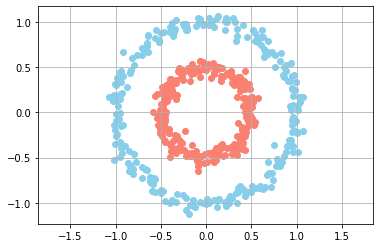

In [15]:
# Crear el dataset
n=500
p=2

X,Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

plt.scatter(X[Y==0,0],X[Y==0,1], c='skyblue')
plt.scatter(X[Y==1,0],X[Y==1,1], c='salmon')
plt.axis('equal')
plt.grid()
plt.show


In [16]:
Y=Y[:,np.newaxis]

In [17]:
class neural_layer():
  def __init__(self, n_inputs, n_neur, activ_func):

    self.activ_func = activ_func
    self.b = np.random.rand(1,n_neur) * 2 -1 #Random number entre [-1,1] para bias (b)
    self.W = np.random.rand(n_inputs,n_neur) * 2 -1 #Random number entre [-1,1] para pesos (W)
    



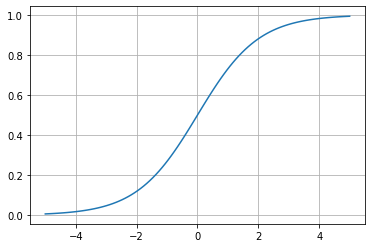

In [18]:
# Funciones de activacion
sigm = (lambda x: 1/(1 + np.e ** (-x)),
        lambda x: x * (1-x))

relu = lambda x: np.maximum(0,x)

_x = np.linspace(-5,5,100)
plt.plot(_x, sigm[0](_x))
plt.grid()

In [19]:
layer0 = neural_layer(p,4,sigm)

In [20]:
def create_nn(topology,activ_func):

  nn= []

  for i,layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[i],topology[i+1],activ_func))

  return nn

topology = [p,4,8,16,8,4,1]
create_nn(topology, sigm)

In [22]:
topology = [p,4,8,16,8,4,1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp,Yr: np.mean((Yp-Yr)**2), #MSE error cuadratico medio
           lambda Yp,Yr: (Yp-Yr)) #Derivada de MSE

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

  out = [(None,X)]

  # Forward pass
  # z: suma ponderada
  # a: funcion activacion (sigm, relu,...)
  
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].activ_func[0](z)
    out.append((z,a))

  print(out[-1][1])

  if train:
    #BackPropagation
    deltas = []

    for l in reversed(range(0,len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]

      if l == len(neural_net) - 1: 
        #Calculamos delta ultima capa
        deltas.insert(0, l2_cost[1](a,Y) * neural_net[1].activ_func[1](a))

      else:
        #Calculamos delta respecto a previa capa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[1].activ_func[1](a))


      _W = neural_net[l].W

      #GradientDescent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr 
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

  return out[-1][1]

train(neural_net,X,Y,l2_cost,0.5)

[[0.8365456 ]
 [0.83646836]
 [0.83644238]
 [0.83665615]
 [0.83640404]
 [0.83639442]
 [0.83643938]
 [0.83640268]
 [0.83649223]
 [0.83656737]
 [0.836468  ]
 [0.83647921]
 [0.83659571]
 [0.83665499]
 [0.83641617]
 [0.83662667]
 [0.83664061]
 [0.8365209 ]
 [0.83663935]
 [0.83658444]
 [0.83664459]
 [0.83651754]
 [0.83637773]
 [0.83652586]
 [0.83637238]
 [0.83659421]
 [0.83652237]
 [0.83652065]
 [0.83656602]
 [0.83664016]
 [0.83659627]
 [0.83656927]
 [0.83644881]
 [0.83665463]
 [0.83661324]
 [0.83645451]
 [0.83645246]
 [0.83656381]
 [0.83646449]
 [0.83649329]
 [0.83643163]
 [0.8364659 ]
 [0.83662349]
 [0.83658698]
 [0.83637758]
 [0.83643036]
 [0.83640758]
 [0.83646468]
 [0.83645551]
 [0.83641021]
 [0.83653688]
 [0.83642709]
 [0.83658108]
 [0.8366334 ]
 [0.83650126]
 [0.83649223]
 [0.83659638]
 [0.83637857]
 [0.8364491 ]
 [0.836664  ]
 [0.83653751]
 [0.83641624]
 [0.83645992]
 [0.83666182]
 [0.83665751]
 [0.83657738]
 [0.83645244]
 [0.83644067]
 [0.83652263]
 [0.8365394 ]
 [0.8364882 ]
 [0.83

array([[0.8365456 ],
       [0.83646836],
       [0.83644238],
       [0.83665615],
       [0.83640404],
       [0.83639442],
       [0.83643938],
       [0.83640268],
       [0.83649223],
       [0.83656737],
       [0.836468  ],
       [0.83647921],
       [0.83659571],
       [0.83665499],
       [0.83641617],
       [0.83662667],
       [0.83664061],
       [0.8365209 ],
       [0.83663935],
       [0.83658444],
       [0.83664459],
       [0.83651754],
       [0.83637773],
       [0.83652586],
       [0.83637238],
       [0.83659421],
       [0.83652237],
       [0.83652065],
       [0.83656602],
       [0.83664016],
       [0.83659627],
       [0.83656927],
       [0.83644881],
       [0.83665463],
       [0.83661324],
       [0.83645451],
       [0.83645246],
       [0.83656381],
       [0.83646449],
       [0.83649329],
       [0.83643163],
       [0.8364659 ],
       [0.83662349],
       [0.83658698],
       [0.83637758],
       [0.83643036],
       [0.83640758],
       [0.836